# Group Project: Recursive Animations and The Towers of Hanoi
###
By Bibi Lucas, Daniel Hogg, Dyland Davis, Desha Wallace and James Lin

In [1]:
# Imports... 
import random, pygame, os

pygame 2.2.0 (SDL 2.0.22, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


# 1. (core)
Task: Animating fractal constructions gives us direct insight into how the function generating the fractal operates. You are given a pygame animation function draw_sierpinski
(in the animation_examples.ipynb file) that draws the Sierpinski triangle. Using this
function the user is able to choose the depth of the triangle and to stop and start the
animation. You should develop this function so that the user is also able to change the
speed of the animation. You should also add colours to the triangle drawing.

In [5]:
def make_sierpinski(depth, triangle, triangle_list):
    '''
    Function inputs: depth (of recursion), triangle (vertex coordinates)
    triangle_list (list of triange coordinates)
    Modifies triangle_list: all the depth 1 (bottom) triangles are added 
    to this list (using recursion relative to the input triangle)
    '''
    (x0,y0) = triangle[0]
    (x1,y1) = triangle[1]
    (x2,y2) = triangle[2]
    # Maximum depth reached (going down) so add this triangle to the list
    if depth == 1:
        triangle_list.append(triangle)
        return None 
    # Otherwise split triangle into three sub triangles
    midpoint_A = (x0 + (x1-x0)/2.0, y0)
    midpoint_B = (x0 + (x2-x0)/2.0, y2 + (y0-y2)/2.0)
    midpoint_C = (x2 + (x1-x2)/2.0, y2 + (y1-y2)/2.0)
    # First triangle, recursive call on it
    new_triangle = ((x0,y0), midpoint_A, midpoint_B)
    make_sierpinski(depth-1, new_triangle, triangle_list)
    # Second triangle, recursive call on it
    new_triangle = (midpoint_A, (x1,y1), midpoint_C)
    make_sierpinski(depth-1,new_triangle,triangle_list)
    # Third triangle, recursive call on it
    new_triangle = (midpoint_B, midpoint_C, (x2,y2))
    make_sierpinski(depth-1, new_triangle, triangle_list)    
    # No need for a return statement (personal preference) 
    return None

In [3]:
def draw_sierpinski(depth=6):
    '''
    Function that draws the Sierpinski triangle as an animation. 
    The depth of the triangle (recursion) can be adjusted by entering 
    a depth integer value (in [1,10]) as a parameter. 
    For example: python sierpinski.py 8 
    '''
    
    dimensions = (900, 862)
    backgroundColour = (255,255,255)
    blue, black = (0,0,255), (0,0,0)
    # This is the overall outline triangle
    master_triangle = ((50,800),(850,800),(450,62))
    min_depth, max_depth = 1, 10
    speed_factor = 4
    depth = 6
    clock = pygame.time.Clock()
    warning = "Depth must be an integer in the interval [1,10]"

    if depth < min_depth: 
        depth = min_depth
        print(warning)
        print("Using depth {}".format(min_depth))
    if depth > max_depth: 
        depth = max_depth
        print(warning)
        print("Using depth {}".format(max_depth))

    # Defines the speed of the animation (see the animation loop) 
    frames_per_second = 20  + 10 * speed_factor
    # Make a list of all the triangle vertex coordinates of the given 
    # depth (in make_sierpinski we process  depth to work down to 1)
    triangle_list = []
    make_sierpinski(depth,master_triangle,triangle_list)

    # Initialise pygame and the screen display object and title
    pygame.init()
    screen = pygame.display.set_mode(dimensions)
    # Put the title and instructions for the animation in the title bar of the animation.
    caption = 'Sierpinski Triangle            '
    caption += '(1)  \'Space\' to start or pause    '
    caption += '(2)  Further keystroke instruction here?'
    pygame.display.set_caption(caption)

    # Initialise the display 
    screen.fill(backgroundColour)
    pygame.display.flip()

    # Total number of triangles to be drawn 
    number_of_triangles = len(triangle_list)
    index = 0
    draw_triangle = False
    keep_running = True

    # Animation loop 
    while keep_running:
        for event in pygame.event.get():
            # Exit (at end of this iteration) using quit (e.g Ctrl-q or red button)
            if event.type == pygame.QUIT:
                keep_running = False
            # Start and pause the animation with the space key 
            elif event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
                draw_triangle  = not draw_triangle 

        # Keep draw next triangle with index 'index' if not told to pause and not complete
        if draw_triangle and index  < number_of_triangles:
            pygame.draw.polygon(screen, black, triangle_list[index], 1)
            # Now update so that latest triangle is added 
            pygame.display.update()
            # Pause time before next iteration starts: one clock tick  
            clock.tick(frames_per_second)
            # Index uptate: index walks through triangle_list indices
            index += 1
            
    pygame.quit()
    return None

In [6]:
def run_sierpinski(): 
    min_depth, max_depth = 1, 10
    default_depth = 6
    # Get the depth from the user 
    try:
        # If either of the following lines failsthen the body of the except statement is run
        depth = int(input("Enter a depth (from {} to {}): ".format(min_depth,max_depth)))
        assert min_depth <= depth <= max_depth
    except:
        print("There was a problem with your input.", end = " ") 
        print("Using default depth:{}".format(default_depth))
        depth = default_depth
    # Now run the animation with the depth input by the user
    draw_sierpinski(depth) 
    return None

In [7]:
run_sierpinski()

# 2. (core)
Task: Fractals can simulate shapes found in the natural word. One simple example of
this is the construction of a recursively defined tree. The tree of depth 1 is just a trunk
with three straight branches. Then given the tree T of depth n the tree of depth n + 1 is
the tree T where every branch has been replaced by a tree of depth 1. In Figure 1 (from
the left) is such a tree of depth 1, 2, 3 and 4 and then a tree of depth 9 partially and
completely drawn.


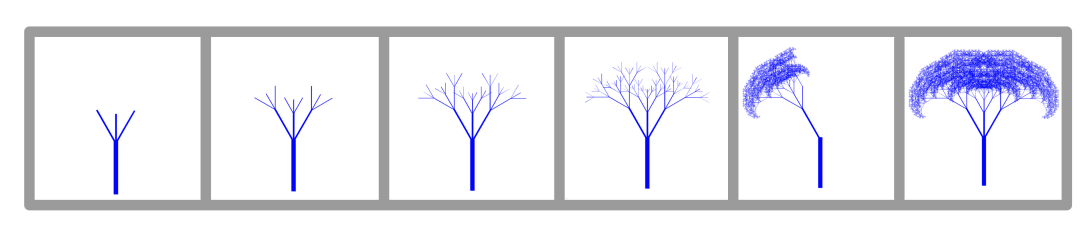



You should develop a pygame animation function that constructs a similar recursive tree.
The user should be able to choose the depth of the tree and should be able to start and
stop the animation and control its speed. The tree should be coloured with the trunk and
branches being brown and the leaves (i.e. the last level of branches) being green

# 3. (core)
Task: (core) Similarly to results in Homework 3 we can show that there are interesting Julia sets
with parameter jp = 0.7885e
ai where a is a small non-negative real number. (In Homework
3, we replaced 0.7885 by 0.66.) In fact if we allow a to vary in repeated cycles over [0, 2π]
we are able to create a film like animation of Julia sets with this form of parameter. The
images in Figure 3 are snapshots of such Julia sets.

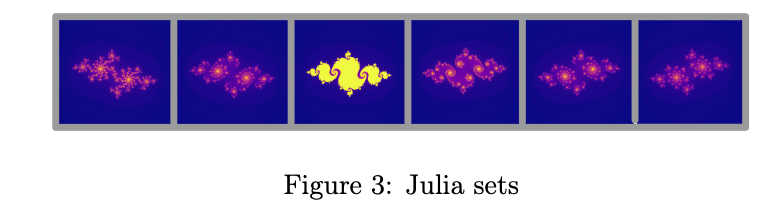

Your task is to develop a function (using the matplotlib.pyplot tools you developed for
Homework 3) to generate a number (for example 200) of image files of the Julia sets with parameter jp = 0.7885e
ai where the numbers a are chosen at equally spaced intervals in
[0, 2π]. You should then develop a pygame function to display these files as a film like
animation. The user should have speed and stop/start control over the animation.



# 4. (core)
Task: In the Towers of Hanoi problem we have three poles and n discs that fit onto the
poles. The discs differ in size and are initially arranged in a stack on one of the poles, in
order from the largest disc (disc n) at the bottom to the smallest disc (disc 1) at the top.
The problem is to move the stack of discs from one pole to another pole while obeying the
following rules.
• Move only one disc at a time.
• Never place a disc on one smaller than it.
This problem can be solved by issuing a sequence/list of instructions for moving the discs
in the appropriate way. We assume that the poles are arranged in a row and that each
instruction to move a disc specifies its number and whether to move it left or right. We
allow wrap around: if a disc is on the left pole an instruction to move left means to wrap
around to the right pole, whereas if a disc is on the right pole an instruction to move right
means to wrap around to the left pole. A solution to the Towers of Hanoi problem for 3
discs is displayed in Figure 4.

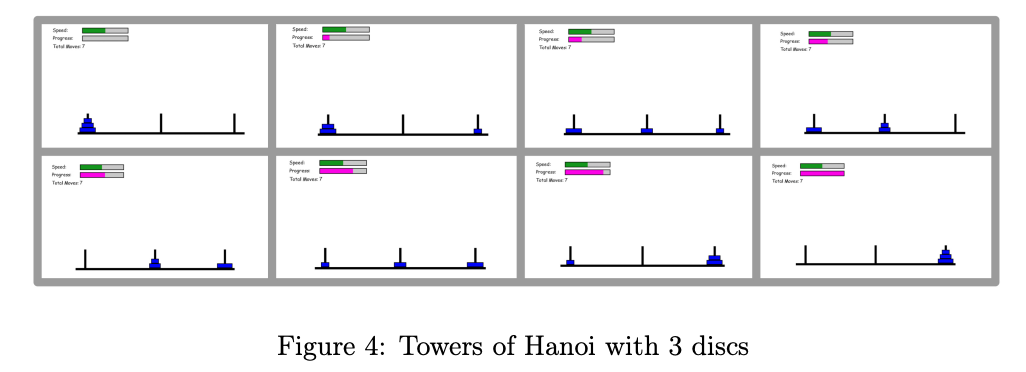


We can solve the problem by recursion. First we move the stack comprising the top n − 1
discs to an empty pole, then we move the largest disc (i.e. the bottom disc of the starting
stack) to the other empty pole. Finally we move the stack of n − 1 discs onto (the pole
with) the largest disc. Figure 5 illustrates this recursive approach.

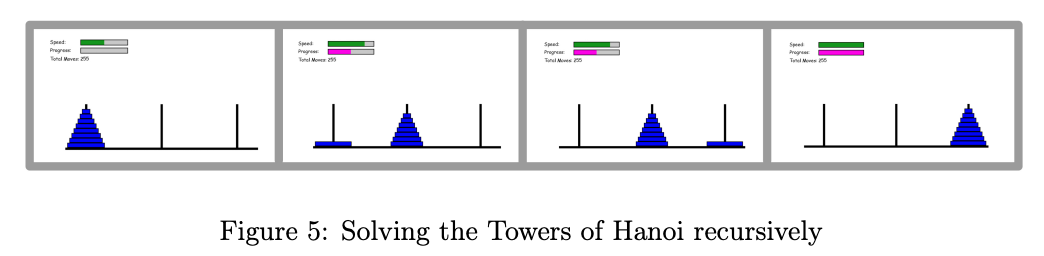

Your task here is to write a function that implements this idea to create, given input n, the
list of moves required to solve the Towers of Hanoi problem for n discs8
. You should then
develop a function that displays a printout of the sequence of configurations of a solution
to the problem for n discs. (To be used for a small number of discs in practice - this is a
warm up for the graphical animation.)

# 5. (core)
Task: Using the function you developed in part 4 to compute the list of moves for the
Towers of Hanoi problem you should now develop a pygame function that gives an animation of the problem. The user should be able to control the initial number of discs,
stopping/starting, and the speed of the animation. The initial number of discs may be any
integer in the interval [1, 16]. (Discs should be moved directly from one pole to another,
i.e. without showing any intermediate motion.)

# Extension
6. Task: (extension) Work out the definition for functions required to solve the two following
variants of the Towers of Hanoi problem. (1) The problem where wrap around is not
permitted: you can only move discs between adjacent poles. (2) The problem where
initially there are 2n discs numbered according to size (as before). The discs with odd
number are in a stack on the left pole, the discs with even number are in a stack on the
right pole. The problem is to move the discs with odd number to the right pole and the
discs with even number to the left pole (still satisfying the two rules given above, with
wrap around allowed). Develop your pygame animation function to show solutions to these
two problems

7. (extension) Develop a version of your Towers of Hanoi pygame animation function from
part 5 that moves the discs smoothly between the poles (i.e. now showing the intermediate
motion).

8. (extension) Develop a version of the Towers of Hanoi pygame animation where a player
can play the problem as a game, by moving the discs from pole to pole.

9. . (extension) Create an animation in which the user is able to repeatedly focus in and out
on any part of the Mandelbrot set. (Remember that in the tutorial of Week 4 we developed
functions to display the Mandelbrot set.) To do this you will want to integrate the use of
a function that generates image files (using matplotlib.pyplot) with a pygame function to
control the animation.